# Importing

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Importing Data

path = r'C:\Users\mkock\Desktop\Data Analytics\Data Immersion\Achievement 6\2022-05 Heart Disease Analysis'

df_heart = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Heart_2020_clean.csv'))

In [5]:
# Make subsets of Heartdisease column

df_yes = (df_heart[df_heart['HeartDisease'] == "Yes"])
df_no = (df_heart[df_heart['HeartDisease'] == "No"])

# Cleaning and Manipulations

In [7]:
df_yes.head()

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [9]:
df_yes_1 = df_yes.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis = 1)

In [10]:
df_yes_1.head()

,Unnamed: 0,BMI,PhysicalHealth,MentalHealth,SleepTime
5,5,28.87,6.0,0.0,12.0
10,10,34.30,30.0,0.0,15.0
35,35,32.98,10.0,0.0,4.0
42,42,25.06,0.0,0.0,7.0
43,43,30.23,6.0,2.0,8.0


In [11]:
df_no_1 = df_yes.drop(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis = 1)

In [12]:
df_no_1.head()

,Unnamed: 0,BMI,PhysicalHealth,MentalHealth,SleepTime
5,5,28.87,6.0,0.0,12.0
10,10,34.30,30.0,0.0,15.0
35,35,32.98,10.0,0.0,4.0
42,42,25.06,0.0,0.0,7.0
43,43,30.23,6.0,2.0,8.0


# Elbow Technique

In [13]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [14]:
score = [kmeans[i].fit(df_yes_1).score(df_yes_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-234084626680311.88,
 -58144834900250.24,
 -26417062591655.754,
 -14813812074383.354,
 -9109145805274.785,
 -6636421730278.1,
 -4668197014325.505,
 -3491526850255.26,
 -2704026317883.794]

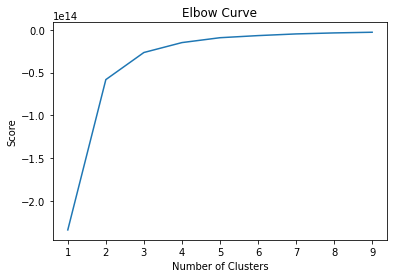

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

As in the example, there is also a large jump between the score values at 2 and 3 clusters. After 3 clusters the curve plateaus, due to this, the optimal cluster count would be 3

# K-Means Clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_yes_1)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [18]:
df_yes_1['clusters'] = kmeans.fit_predict(df_yes_1)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
df_yes_1.head()

,Unnamed: 0,BMI,PhysicalHealth,MentalHealth,SleepTime,clusters
5,5,28.87,6.0,0.0,12.0,0
10,10,34.30,30.0,0.0,15.0,0
35,35,32.98,10.0,0.0,4.0,0
42,42,25.06,0.0,0.0,7.0,0
43,43,30.23,6.0,2.0,8.0,0


In [20]:
df_yes_1['clusters'].value_counts()

2    9488
0    8945
1    8828
Name: clusters, dtype: int64

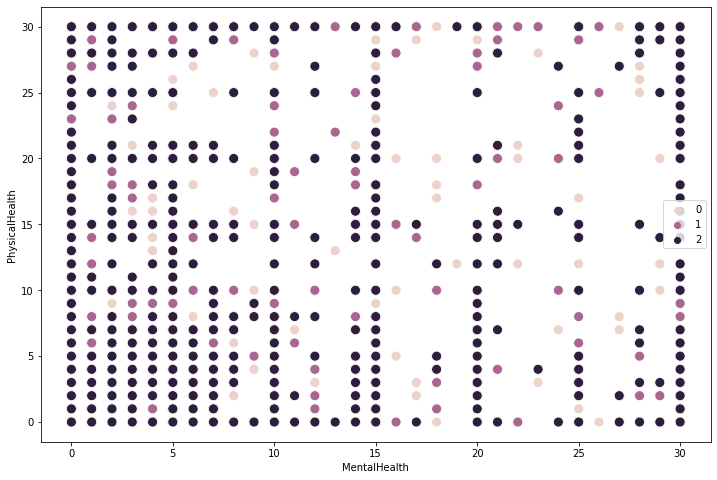

In [28]:
# Plot the clusters for the "MentalHealth" and "PhysicalHealth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_yes_1['MentalHealth'], y=df_yes_1['PhysicalHealth'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('MentalHealth') # Label x-axis.
plt.ylabel('PhysicalHealth') # Label y-axis.
plt.show()

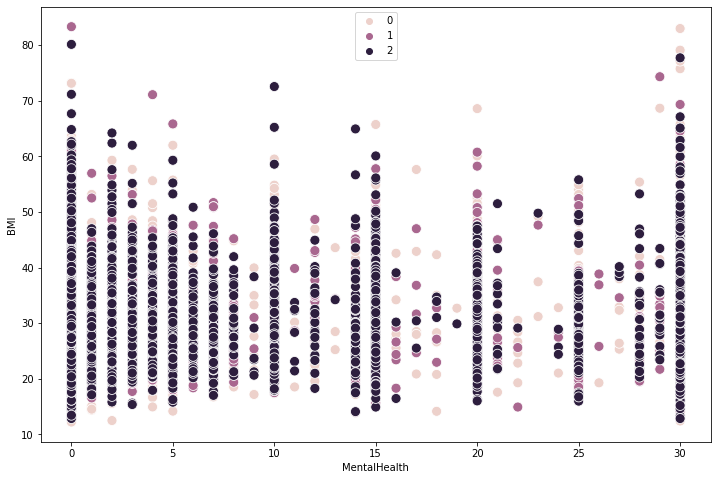

In [29]:
# Plot the clusters for the "BMI" and "MentalHealth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_yes_1['MentalHealth'], y=df_yes_1['BMI'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('MentalHealth') 
plt.ylabel('BMI') 
plt.show()

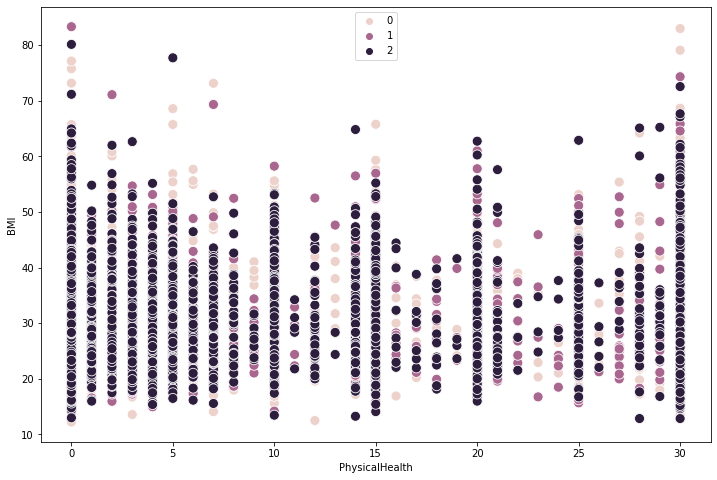

In [30]:
# Plot the clusters for the "BMI" and "PhysicalHealth" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_yes_1['PhysicalHealth'], y=df_yes_1['BMI'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('PhysicalHealth') 
plt.ylabel('BMI') 
plt.show()

These visualizations again show the little correlation between the data, which I assume to be due to the data being random survey data, even though the population the data was gathered from is large, the type of data it being is still very subjective to the individual eg. Mental health. There is some clustering of the data on day 30 of mental and physical health which I deep important. Majority of the datapoints are around 0 days for both variables, so for at 30 days to be significant clustering is valuable as it shows that a comparable part of the population suffers from bad physical and mental health for 30 days in the last month. I do however, believe the data should be explored further.

In [33]:
df_yes_1.head()

,Unnamed: 0,BMI,PhysicalHealth,MentalHealth,SleepTime,clusters,cluster
5,5,28.87,6.0,0.0,12.0,0,pink
10,10,34.30,30.0,0.0,15.0,0,pink
35,35,32.98,10.0,0.0,4.0,0,pink
42,42,25.06,0.0,0.0,7.0,0,pink
43,43,30.23,6.0,2.0,8.0,0,pink


In [32]:
df_yes_1.loc[df_yes_1['clusters'] == 2, 'cluster'] = 'dark purple'
df_yes_1.loc[df_yes_1['clusters'] == 1, 'cluster'] = 'purple'
df_yes_1.loc[df_yes_1['clusters'] == 0, 'cluster'] = 'pink'

In [35]:
df_yes_1.groupby('cluster').agg({'BMI':['mean', 'median'], 
                         'PhysicalHealth':['mean', 'median'], 
                         'MentalHealth':['mean', 'median'],
                          'SleepTime':['mean', 'median']})

BMI        PhysicalHealth        MentalHealth         \
                  mean median           mean median         mean median   
cluster                                                                   
dark purple  29.569231  28.48       8.034043    0.0     4.764334    0.0   
pink         29.283402  28.25       8.198435    1.0     4.790609    0.0   
purple       29.372986  28.34       7.269257    0.0     4.418101    0.0   

            SleepTime         
                 mean median  
cluster                       
dark purple  7.068508    7.0  
pink         7.158413    7.0  
purple       7.182714    7.0

The statistics are very similar to eachother in each cluster, I believe this to be due to the nature of the data being random survey data, and with the sheer amount of datapoints on 0 days for phyical and mental health does skew the data towards the left(lower values). For detailed analysis of the mental and physical health states of individuals suffering from heart disease, I would in a furtur analysis, remove the "0 bad day" entries, to only look at individuals who does suffer from mental health issues, and perhaps go through the same filtering process for the individuals that does not suffer from heart disease and compare the mental and physical healths of the 2 groups of people